In [88]:
import numpy as np 
import pandas as pd 
import os 
from scipy.stats.mstats import gmean
from matplotlib import pyplot as plt 

In [15]:
data_folder = 'USDA-AMS-Data-and-Metrics'
folders = os.listdir(data_folder)

In [120]:
folders

['Business Development and Infrastructure',
 'Food Access',
 'Grants',
 'Indicators of Community Wealth',
 'Labor',
 'Local Food Sales',
 'metadata_all_files.csv',
 'Point level data',
 'README.md']

In [118]:
for folder in folders: 
    filepath = data_folder + "//" + folders[0]
    csv_file = [file for file in os.listdir(filepath) if "csv" in file]
    file = os.listdir(filepath)[1]
    full_data = pd.read_csv(filepath + "//" + file, index_col=[0,1])

In [119]:
full_data

state_name                   category  \
fips county_name                                                      
4013 Maricopa County             Arizona  Processing & Distribution   
6057 Nevada County            California  Processing & Distribution   
6073 San Diego County         California  Processing & Distribution   
6075 San Francisco County     California  Processing & Distribution   
8003 Alamosa County             Colorado  Processing & Distribution   
...                                  ...                        ...   
54   NaN                   West Virginia  Processing & Distribution   
55   NaN                       Wisconsin  Processing & Distribution   
     NaN                       Wisconsin  Processing & Distribution   
0    NaN                              US  Processing & Distribution   
     NaN                              US  Processing & Distribution   

                          topic_area  year  \
fips county_name                             
4013 Maricopa County       Food hubs  2022   
6057 Nevada County         Food hubs  2022   
6073 San Diego County      Food hubs  2022   
6075 San Francisco County  Food hubs  2022   
8003 Alamosa County        Food hubs  2022   
...                              ...   ...   
54   NaN                     Storage  2021   
55   NaN                     Storage  2021   
     NaN                     Storage  2021   
0    NaN                     Storage  2021   
     NaN                     Storage  2021   

                                                          variable_name  value  
fips county_name                                                                
4013 Maricopa County                                   number_food_hubs      1  
6057 Nevada County                                     number_food_hubs      1  
6073 San Diego County                                  number_food_hubs      1  
6075 San Francisco County                              number_food_hubs      1  
8003 Alamosa County                                    number_food_hubs      1  
...                                                                 ...    ...  
54   NaN                   private_semi_private_refrigerated_warehouses      1  
55   NaN                                 public_refrigerated_warehouses     38  
     NaN                   private_semi_private_refrigerated_warehouses     54  
0    NaN                                 public_refrigerated_warehouses    517  
     NaN                   private_semi_private_refrigerated_warehouses    387  

[12838 rows x 6 columns]

In [66]:
# make index just for year 2022 to start 
index_data = pd.DataFrame(index = full_data.index[full_data["year"] == 2022], 
                         columns = ["total_index", "acessibility", "inequality", "affordability", "nutritional_quality"])

In [68]:
accessibility_vars = [
    "pct_laccess_hhnv", "food_banks", "food_desert_1and10", # distance
    "supercpth", "grocpth", # population
    "retail_density_index", # retail food store density index 
    "food_insecurity_rate" # food insecurity rate
]

accessibility_df = full_data[full_data["variable_name"].isin(accessibility_vars)]

accessibility_df

state_name     category       topic_area  year  \
fips county_name                                                         
1001 Autauga County        Alabama  Food Access       Food Store  2015   
     Autauga County        Alabama  Food Access       Food Store  2016   
     Autauga County        Alabama  Food Access       Food Store  2016   
     Autauga County        Alabama  Food Access       Food Store  2016   
1003 Baldwin County        Alabama  Food Access       Food Store  2015   
...                            ...          ...              ...   ...   
51   NaN                  Virginia  Food Access  Food Insecurity  2019   
53   NaN                Washington  Food Access  Food Insecurity  2019   
54   NaN             West Virginia  Food Access  Food Insecurity  2019   
55   NaN                 Wisconsin  Food Access  Food Insecurity  2019   
56   NaN                   Wyoming  Food Access  Food Insecurity  2019   

                            variable_name     value  
fips county_name                                     
1001 Autauga County      pct_laccess_hhnv  0.033513  
     Autauga County               grocpth  0.054271  
     Autauga County             supercpth  0.018090  
     Autauga County  retail_density_index  0.128134  
1003 Baldwin County      pct_laccess_hhnv  0.019051  
...                                   ...       ...  
51   NaN             food_insecurity_rate  0.094000  
53   NaN             food_insecurity_rate  0.104000  
54   NaN             food_insecurity_rate  0.135000  
55   NaN             food_insecurity_rate  0.091000  
56   NaN             food_insecurity_rate  0.117000  

[15762 rows x 6 columns]

In [70]:
grouped = accessibility_df.groupby("variable_name")

In [87]:
accessibility_df.groupby("variable_name").describe()["value"]


,count,mean,std,min,25%,50%,75%,max
variable_name,,,,,,,,
food_insecurity_rate,3193.0,0.130778,0.037032,0.029,0.105000,0.129000,0.155000,0.294000
grocpth,3143.0,0.243835,0.216536,0.000,0.132983,0.186116,0.279887,3.267974
pct_laccess_hhnv,3140.0,0.032892,0.032135,0.000,0.016832,0.026730,0.040362,0.606024
retail_density_index,3143.0,0.179654,0.080940,0.000,0.129838,0.161996,0.209280,1.000000
supercpth,3143.0,0.018255,0.022460,0.000,0.000000,0.014654,0.029268,0.250752


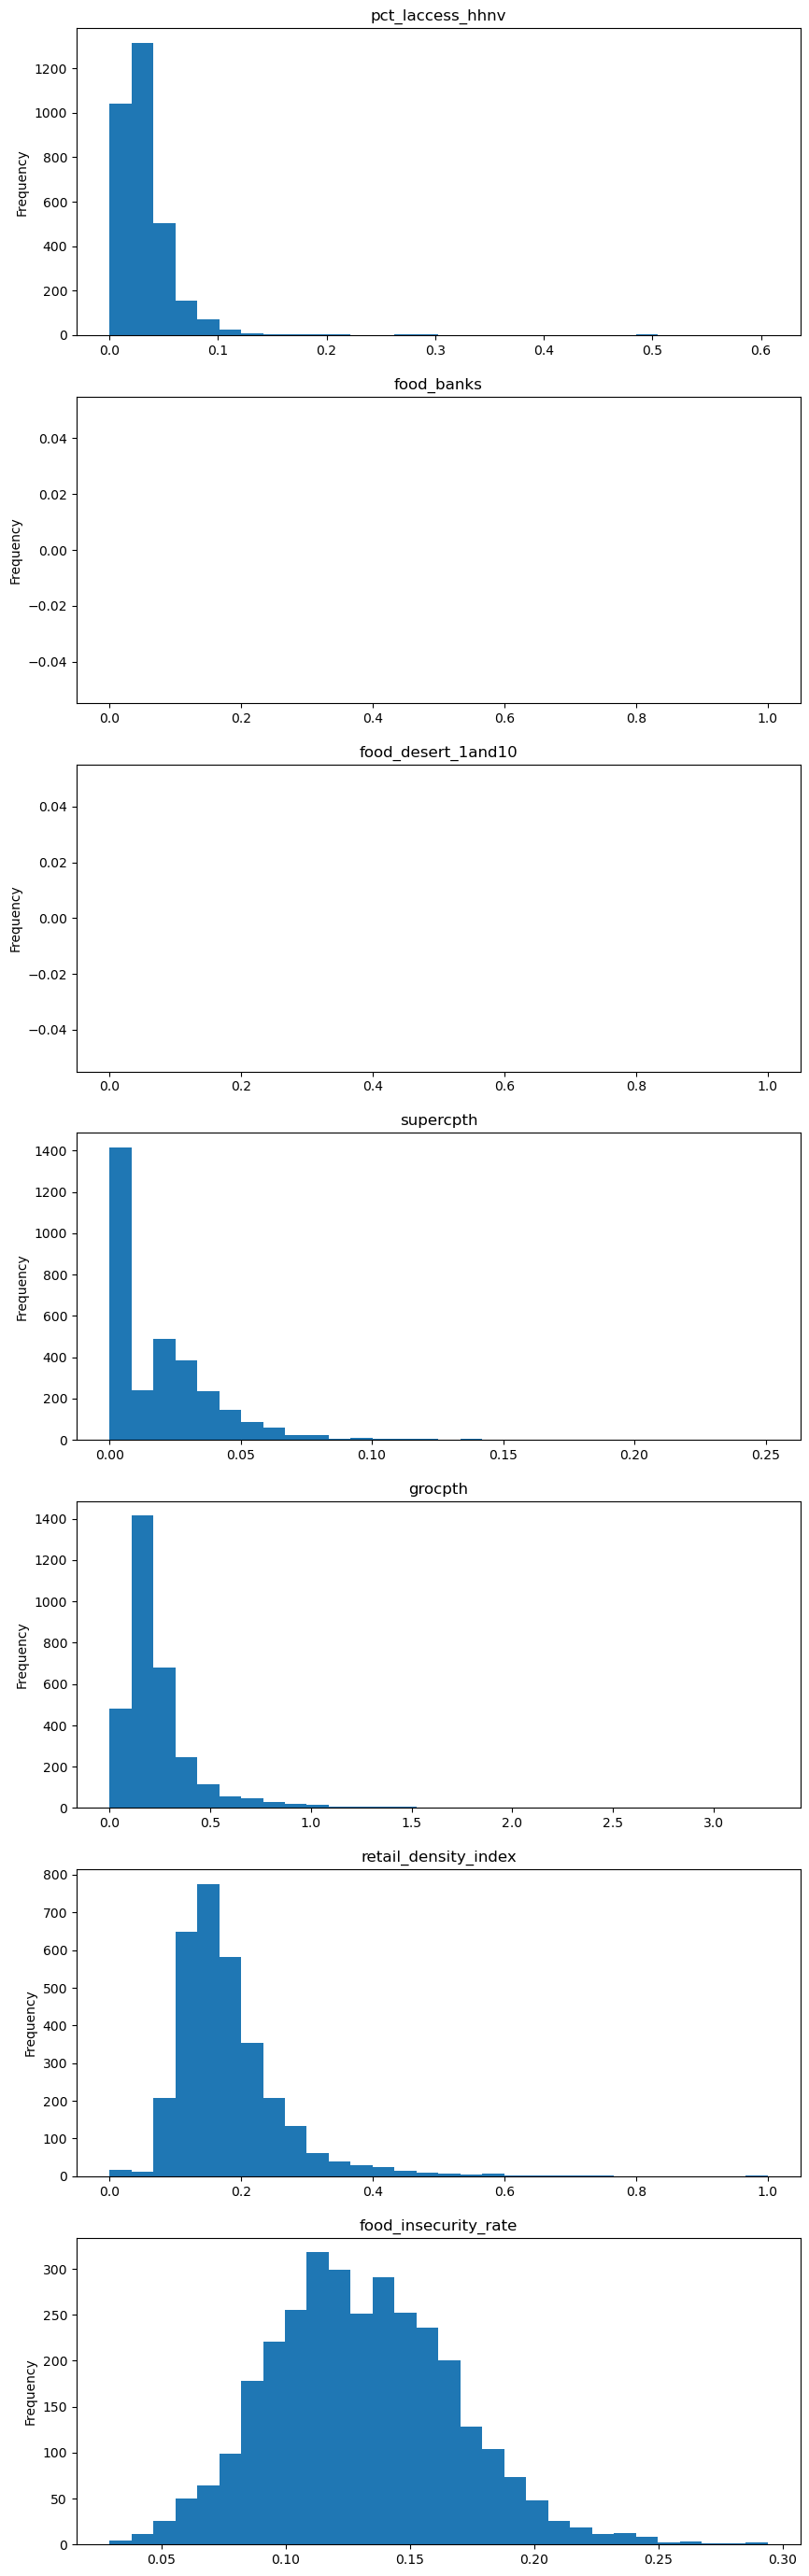

In [99]:
fig, axs = plt.subplots(len(accessibility_vars),1,  figsize = (10, 5*len(accessibility_vars)))

for i, var in enumerate(accessibility_vars): 
    accessibility_df[accessibility_df["variable_name"] == var]["value"].plot.hist(ax=axs[i], bins=30, title=var)

In [111]:
accessibility_df[accessibility_df["variable_name"] == "food_insecurity_rate"]

,,state_name,category,topic_area,year,variable_name,value
fips,county_name,,,,,,
1001,Autauga County,Alabama,Food Access,Food Insecurity,2019,food_insecurity_rate,0.157
1003,Baldwin County,Alabama,Food Access,Food Insecurity,2019,food_insecurity_rate,0.134
1005,Barbour County,Alabama,Food Access,Food Insecurity,2019,food_insecurity_rate,0.207
1007,Bibb County,Alabama,Food Access,Food Insecurity,2019,food_insecurity_rate,0.163
1009,Blount County,Alabama,Food Access,Food Insecurity,2019,food_insecurity_rate,0.145
...,...,...,...,...,...,...,...
51,NaN,Virginia,Food Access,Food Insecurity,2019,food_insecurity_rate,0.094
53,NaN,Washington,Food Access,Food Insecurity,2019,food_insecurity_rate,0.104
54,NaN,West Virginia,Food Access,Food Insecurity,2019,food_insecurity_rate,0.135


In [117]:
counties = accessibility_df.index.unique()
county_data = {}
for county in counties: 
    county_data[county] = {}
    for var in accessibility_vars: 
        county_data[county][var] = accessibility_df[accessibility_df["variable_name"] == var][accessibility_df.index == county]["value"]

ValueError: Item wrong length 15762 instead of 3140.

In [86]:
accessibility_df[accessibility_df["food_insecurity_rate"].isna() == False]

,pct_laccess_hhnv,food_banks,food_desert_1and10,supercpth,grocpth,retail_density_index,food_insecurity_rate,index
fips,,,,,,,,
1001,NaN,NaN,5.0,NaN,NaN,NaN,0.157,NaN
1003,NaN,NaN,4.0,NaN,NaN,NaN,0.134,NaN
1005,NaN,NaN,4.0,NaN,NaN,NaN,0.207,NaN
1007,NaN,NaN,0.0,NaN,NaN,NaN,0.163,NaN
1009,NaN,NaN,0.0,NaN,NaN,NaN,0.145,NaN
...,...,...,...,...,...,...,...,...
56037,NaN,NaN,0.0,NaN,NaN,NaN,0.113,NaN
56039,NaN,NaN,0.0,NaN,NaN,NaN,0.090,NaN
56041,NaN,NaN,0.0,NaN,NaN,NaN,0.126,NaN
